In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix
)


In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

X.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
y.value_counts()


,count
target,
1,357
0,212


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [5]:
log_reg_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)


In [6]:
log_reg_cv = cross_val_score(log_reg_pipeline, X_train, y_train, cv=5, scoring="roc_auc")
rf_cv = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="roc_auc")

print("Logistic Regression CV ROC-AUC:", log_reg_cv.mean())
print("Random Forest CV ROC-AUC:", rf_cv.mean())


Logistic Regression CV ROC-AUC: 0.993498452012384
Random Forest CV ROC-AUC: 0.987358101135191


In [7]:
log_reg_pipeline.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [8]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    }


In [9]:
log_reg_results = evaluate_model(log_reg_pipeline, X_test, y_test)
rf_results = evaluate_model(rf_model, X_test, y_test)

results_df = pd.DataFrame([log_reg_results, rf_results],
                          index=["Logistic Regression", "Random Forest"])
results_df


,Accuracy,Precision,Recall,F1,ROC-AUC
Logistic Regression,0.982456,0.986111,0.986111,0.986111,0.995370
Random Forest,0.956140,0.958904,0.972222,0.965517,0.993056


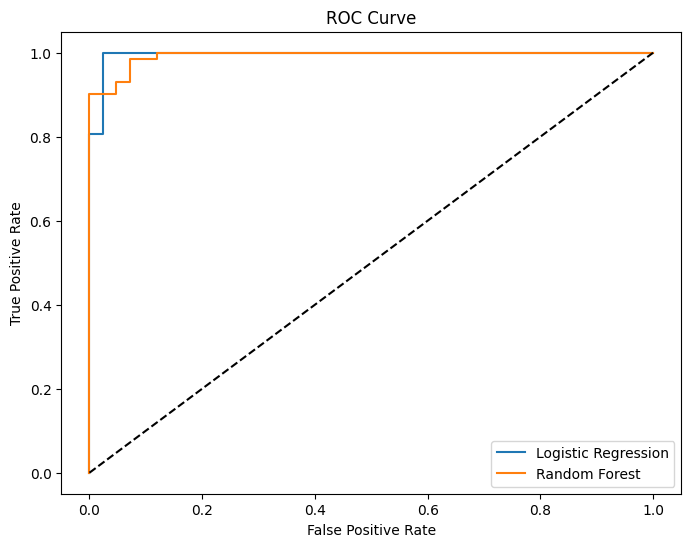

In [10]:
plt.figure(figsize=(8,6))

for model, label in zip(
    [log_reg_pipeline, rf_model],
    ["Logistic Regression", "Random Forest"]
):
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=label)

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


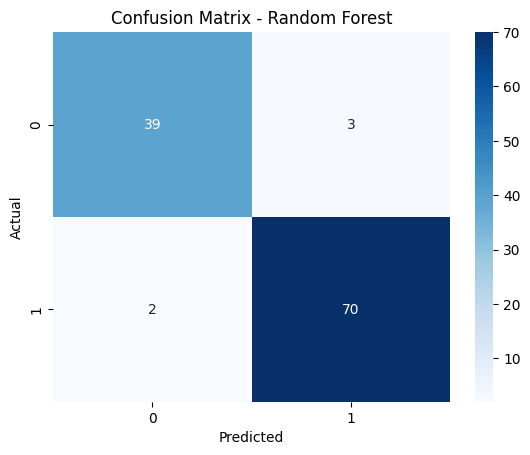

In [11]:
cm = confusion_matrix(y_test, rf_model.predict(X_test))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [12]:
results_df


,Accuracy,Precision,Recall,F1,ROC-AUC
Logistic Regression,0.982456,0.986111,0.986111,0.986111,0.995370
Random Forest,0.956140,0.958904,0.972222,0.965517,0.993056


📊 Model Evaluation Results

The table above summarizes the performance of the two classification models evaluated in this project. Logistic Regression achieved the highest overall performance with an accuracy of 98.24%, precision of 98.61%, recall of 98.61%, and an F1-score of 98.61%. The ROC-AUC score of 0.995 indicates excellent class separation.

The Random Forest model also performed well, achieving an accuracy of 95.61% and a high recall of 97.22%, demonstrating its effectiveness in identifying positive cases.

🏆 Final Model Selection

Based on the evaluation metrics, Logistic Regression was selected as the final model. It outperformed Random Forest across most metrics while remaining simpler and more interpretable, making it a suitable choice for this classification task.

✅ Conclusion

This project successfully demonstrated the application of supervised machine learning techniques for classification. The dataset was preprocessed, split into training and testing sets, and evaluated using cross-validation. Two classification models—Logistic Regression and Random Forest—were implemented and compared using accuracy, precision, recall, F1-score, and ROC-AUC metrics. Logistic Regression achieved the best overall performance and was selected as the final model.